In [12]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

from qiskit_aer import AerError

In [22]:
import networkx as nx
import numpy as np
from qiskit_aer import Aer
from qiskit import transpile

from qiskit_algorithms import QAOA
from qiskit_algorithms.optimizers import COBYLA
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_algorithms.utils import algorithm_globals
from matplotlib import pyplot as plt

try:
    simulator = AerSimulator(method='automatic', device='GPU')

except AerError as e:
    print(e)

In [23]:
# Set the random seed for reproducibility
algorithm_globals.random_seed = 42

def generate_random_graph(n_nodes, edge_prob):
    """Generate a random graph with n nodes and edge probability."""
    return nx.gnp_random_graph(n_nodes, edge_prob, seed=42)

def maxcut_obj_fun(graph):
    """Create the objective function for the maxcut problem."""
    w = np.zeros((len(graph.nodes), len(graph.nodes)))
    for i, j in graph.edges():
        w[i, j] = 1
    return w

def create_qaoa_circuit(graph):
    """Create a QAOA circuit for the given graph."""
    qubo = QuadraticProgram()
    num_vertices = len(graph.nodes)
    for i in range(num_vertices):
        qubo.binary_var(name=f"x_{i}")
    
    # Add MaxCut objective to the QUBO
    w = maxcut_obj_fun(graph)
    qubo.minimize(quadratic=w)
    
    # Use QAOA to solve QUBO
    optimizer = COBYLA()
    qaoa = QAOA(optimizer, quantum_instance=Aer.get_backend('aer_simulator'), reps=1)
    qaoa_optimizer = MinimumEigenOptimizer(qaoa)
    
    return qaoa, qaoa_optimizer, qubo

def optimize_qaoa(qaoa, qaoa_optimizer, qubo):
    """Optimize QAOA parameters and return the result."""
    result = qaoa_optimizer.solve(qubo)
    return result


In [24]:
# Number of nodes in each graph
n_nodes = 5
# Probability of an edge between nodes
edge_prob = 0.5
# Number of graphs
n_graphs = 100

results = []
graphs = [generate_random_graph(n_nodes, edge_prob) for _ in range(n_graphs)]

for graph in graphs:
    qaoa, qaoa_optimizer, qubo = create_qaoa_circuit(graph)
    result = optimize_qaoa(qaoa, qaoa_optimizer, qubo)
    results.append(result)

# Plotting one of the graphs and its result
graph = graphs[0]
result = results[0]
colors = ['r' if result.variables_dict[f'x_{i}'] == 0 else 'b' for i in range(n_nodes)]
nx.draw(graph, node_color=colors, with_labels=True)
plt.show()

# Print the optimal result for the first graph
print("Optimal result for the first graph:", result)

QiskitBackendNotFoundError: 'More than one backend matches the criteria'

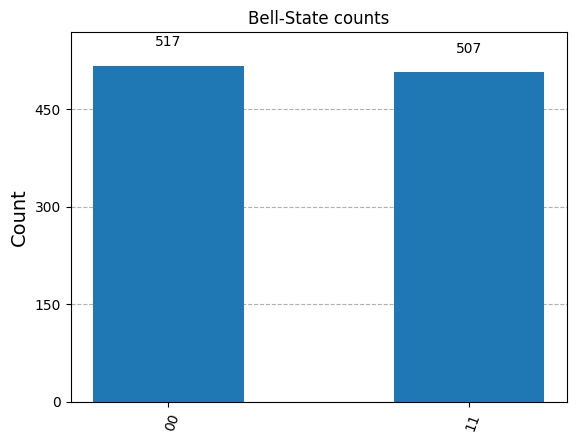

In [14]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = AerSimulator()
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [2]:
from qiskit import Aer

ImportError: cannot import name 'Aer' from 'qiskit' (/home/daniel/virtualenvs/quantum/lib/python3.8/site-packages/qiskit/__init__.py)

In [2]:
# OLD VERSION qiskit 0.X
# from qiskit import IBMQ
# IBMQ.load_account()

In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
 
# Create empty circuit
example_circuit = QuantumCircuit(2)
example_circuit.measure_all()
 
# You'll need to specify the credentials when initializing QiskitRuntimeService, if they were not previously saved.
service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)
 
sampler = Sampler(backend)
job = sampler.run([example_circuit])
print(f"job id: {job.job_id()}")
result = job.result()
print(result)

job id: csr4j99vnxy0008e88hg


In [3]:
from qiskit import *

In [4]:
%matplotlib inline

In [5]:
qreg = QuantumRegister(2)  # Q-register
creg = ClassicalRegister(2) # classical register to make the measurements
circuit = QuantumCircuit(qreg,creg)

In [6]:
circuit.draw()

q0_0: 
      
q0_1: 
      
c0: 2/

In [7]:
circuit.h(qreg[0])

In [8]:
circuit.draw()

┌───┐
q0_0: ┤ H ├
      └───┘
q0_1: ─────
           
c0: 2/═════

In [9]:
circuit.cx(qreg[0], qreg[1]) 

In [10]:
circuit.draw()

┌───┐     
q0_0: ┤ H ├──■──
      └───┘┌─┴─┐
q0_1: ─────┤ X ├
           └───┘
c0: 2/══════════

In [11]:
circuit.measure(qreg, creg)

In [12]:
circuit.draw()

┌───┐     ┌─┐   
q0_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q0_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

## Quantum Simulator backend

In [14]:
simulator = Aer.get_backend('qasm_simulator')

In [29]:
result = execute(circuit, backend = simulator, shots=10000).result()

In [30]:
print(result)

Result(backend_name='qasm_simulator', backend_version='0.13.2', qobj_id='', job_id='bfdf8113-f8ff-4cd7-bee5-87700cd0ef31', success=True, results=[ExperimentResult(shots=10000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x3': 5068, '0x0': 4932}), header=QobjExperimentHeader(creg_sizes=[['c0', 2]], global_phase=0.0, memory_slots=2, n_qubits=2, name='circuit-152', qreg_sizes=[['q0', 2]], metadata={}), status=DONE, seed_simulator=3635975600, metadata={'time_taken': 0.0150678, 'num_bind_params': 1, 'parallel_state_update': 8, 'parallel_shots': 1, 'required_memory_mb': 0, 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'stabilizer', 'device': 'CPU', 'num_qubits': 2, 'sample_measure_time': 0.00600355, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'remapped_qubits': False, 'runtime_parameter_bind': False, 'max_memory_mb': 15670, 'noise': 'ideal', 'measure_sampling': True, 'batched_shots_optimization': False, 'fusion': {'enabled': False}}, time_taken=0.0150678)], date=2024-

In [31]:
from qiskit.visualization import plot_histogram

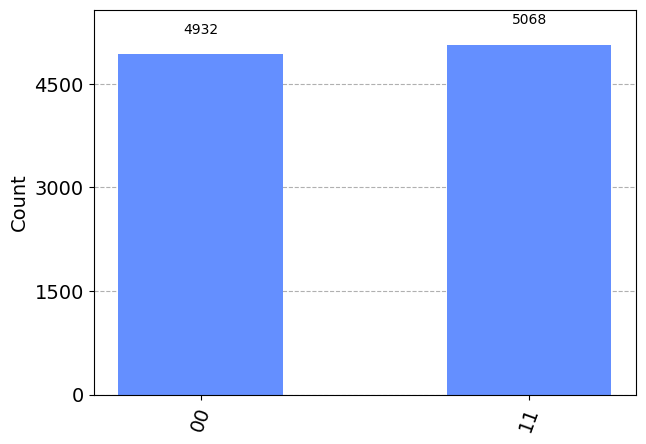

In [32]:
plot_histogram(result.get_counts(circuit))


In [33]:
result.get_counts()

{'11': 5068, '00': 4932}

## IBM Quantum Computer Backend

In [36]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2024-01-23 15:20:26,331: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [38]:
provider = IBMQ.get_provider('ibm-q')

In [40]:
available_cloud_backends = provider.backends()
print('\n Cloud backends:')

for i in available_cloud_backends: 
    print(i)

available_local_backends = Aer.backends()    
print('\n Local backends: ')
for i in available_local_backends: 
    print(i)


 Cloud backends:
ibmq_qasm_simulator
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibm_brisbane
ibm_kyoto
ibm_osaka

 Local backends: 
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
AerSimulator('aer_simulator')
QasmSimulator('qasm_simulator')
StatevectorSimulator('statevector_simulator')
UnitarySimulator('unitary_simulator')


In [44]:
qcomp = provider.get_backend('ibm_osaka')
job = execute(circuit, backend = qcomp)

In [46]:
from qiskit.tools.monitor import job_monitor

In [47]:
job_monitor(job)

Job Status: job has successfully run


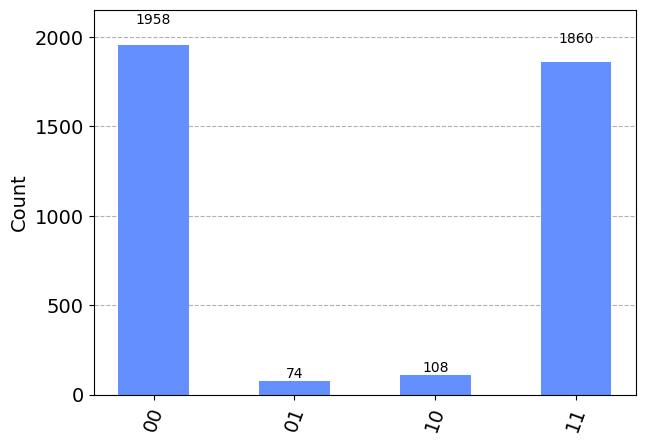

In [48]:
result = job.result()
plot_histogram(result.get_counts(circuit))